# 75.06/95.58 Organización de Datos
## Finger 4: Reducción de dimensiones.

    GTExdata.csv
    SampleLabels.csv
    
    El primer archivo contiene 1641 observaciones, y el segundo archivo contiene para cada una de esas observaciones su label correspondiente 
    respetando el orden de los registros. Es decir, por ejemplo, el label del primer registro de GTExdata.csv es el primer registro del archivo 
    SampleLabels.csv y así sucesivamente. El label que vamos a usar es Tissue type.
    
    Se plantean los siguientes puntos a realizar:
    
    1) Realizar una descomposición en valores singulares sobre el set y luego:
      a. Graficar la energía acumulada en función de la cantidad de autovalores, y graficar los autovalores del set.
      b. Con los dos gráficos anteriores, indicar qué valor de k se podría utilizar para realizar una aproximación. 
      c. Realizar una reducción a dos dimensiones del set de datos y graficar los puntos en un scatter-plot utilizando colores para indicar el label 
    correspondiente a cada punto.
    Atención: Prestar demasiada atención a las dimensiones de las matrices U, Sigma y V. Según la biblioteca o función utilizada, las dimensiones 
    pueden variar dependiendo si la SVD se calcula usando su forma reducida o no.
    
    

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import datetime as datetime
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

import time

from PIL import Image

from sklearn.manifold import TSNE

In [66]:
data=pd.read_csv('/home/sherly/Dataset files (210.0 MB)/data/GTExdata.csv',low_memory=False)
data.head()

,-0.81443,-0.1728,-0.13566,4.036,3.4742,0.017055,0.76495,3.0281,0.56595,1.9045,...,-0.88508,-2.2228,-3.0385,-2.8584,-3.4724,-2.5374,-2.9705,-1.8397,-2.1044,-1.9881
0,-1.219500,-0.139670,-0.217330,-1.4361,-0.86158,0.403280,-0.91309,6.9136,4.38540,6.15440,...,2.01310,1.25060,0.333560,0.37651,-0.086984,0.221580,1.205700,0.81913,0.20093,1.371100
1,-0.010044,-0.042155,0.111440,-1.0768,-0.72246,0.651900,-0.79763,5.6678,2.94680,4.63420,...,-1.07800,-0.52936,-0.989140,-3.10870,-3.262500,-1.159200,0.091823,-1.14740,-1.59540,-0.092996
2,-1.336400,-0.088622,-0.126460,-1.7866,-0.99562,0.009797,-1.05550,6.5985,4.22730,6.02260,...,0.67228,0.98691,0.142270,0.34028,-0.129170,0.064783,1.279200,1.05850,0.63342,1.581000
3,-1.055100,-0.065230,-0.087368,-1.4559,-0.69961,0.205960,-0.83905,6.1986,4.05600,5.78430,...,0.48401,0.63014,0.061371,-0.82861,-1.537200,-0.121850,0.735520,0.32366,-0.54558,0.789580
4,-0.538700,-0.184340,-0.266680,-1.8266,-0.79040,0.593780,-0.79899,-1.7453,-0.25312,-0.47961,...,-0.22813,1.03090,1.608100,1.59950,1.478600,2.137100,0.563560,0.11520,-0.21623,0.675090


In [67]:
data.shape

(1640, 16142)

In [68]:
data.values

array([[-1.2195  , -0.13967 , -0.21733 , ...,  0.81913 ,  0.20093 ,
         1.3711  ],
       [-0.010044, -0.042155,  0.11144 , ..., -1.1474  , -1.5954  ,
        -0.092996],
       [-1.3364  , -0.088622, -0.12646 , ...,  1.0585  ,  0.63342 ,
         1.581   ],
       ...,
       [-0.31041 , -0.087937, -0.13527 , ...,  0.31426 ,  0.089002,
         1.3804  ],
       [ 0.60242 ,  0.1638  ,  0.18639 , ..., -0.24721 , -0.52543 ,
        -0.053404],
       [-0.040194, -0.040566, -0.14795 , ...,  0.55453 ,  0.38868 ,
         0.68318 ]])

In [69]:
data.columns

Index(['-0.81443', '-0.1728', '-0.13566', '4.036', '3.4742', '0.017055',
       '0.76495', '3.0281', '0.56595', '1.9045',
       ...
       '-0.88508', '-2.2228', '-3.0385', '-2.8584', '-3.4724', '-2.5374',
       '-2.9705', '-1.8397', '-2.1044', '-1.9881'],
      dtype='object', length=16142)

In [70]:
label=pd.read_csv('/home/sherly/Dataset files (210.0 MB)/data/SampleLabels.csv',low_memory=False)
label.head()

,Sampleid,Tissue type specific,Tissue type
0,GTEX-N7MS-0007-SM-2D7W1,Whole Blood,Blood
1,GTEX-N7MS-0011-R10A-SM-2HMJK,Brain - Frontal Cortex (BA9),Brain
2,GTEX-N7MS-0011-R11A-SM-2HMJS,Brain - Cerebellar Hemisphere,Brain
3,GTEX-N7MS-0011-R1a-SM-2HMJG,Brain - Hippocampus,Brain
4,GTEX-N7MS-0011-R2a-SM-2HML6,Brain - Substantia nigra,Brain


In [71]:
label.shape

(1641, 3)

In [72]:
#llevamos los datos a una representacion matricial con numpy para poder operar
dataMat=np.array(data,float)
dataMat=np.matrix(dataMat)

In [73]:
dataMat

matrix([[-1.2195  , -0.13967 , -0.21733 , ...,  0.81913 ,  0.20093 ,
          1.3711  ],
        [-0.010044, -0.042155,  0.11144 , ..., -1.1474  , -1.5954  ,
         -0.092996],
        [-1.3364  , -0.088622, -0.12646 , ...,  1.0585  ,  0.63342 ,
          1.581   ],
        ...,
        [-0.31041 , -0.087937, -0.13527 , ...,  0.31426 ,  0.089002,
          1.3804  ],
        [ 0.60242 ,  0.1638  ,  0.18639 , ..., -0.24721 , -0.52543 ,
         -0.053404],
        [-0.040194, -0.040566, -0.14795 , ...,  0.55453 ,  0.38868 ,
          0.68318 ]])

***
***
# a. Graficar la energía acumulada en función de la cantidad de autovalores, y graficar los autovalores del set.

In [10]:
# realizamos la descomposicion en valores singulares
u, s, v = np.linalg.svd(dataMat)

In [11]:
s

array([2.52942267e+03, 2.15350881e+03, 1.85728127e+03, ...,
       9.47585838e+00, 9.39885946e+00, 5.49027077e-01])

In [12]:
len(s)

1640

In [13]:
u

matrix([[-0.00703632, -0.05159181, -0.02688277, ..., -0.01438146,
          0.02250871,  0.02506192],
        [-0.01036805, -0.04717453, -0.03237933, ...,  0.00655914,
          0.00481917,  0.02418323],
        [-0.0061543 , -0.04945944, -0.02910699, ..., -0.00251176,
         -0.04036477,  0.02479664],
        ...,
        [-0.00904139,  0.00934088,  0.01480289, ..., -0.0019932 ,
          0.00984787,  0.02446918],
        [-0.01286939, -0.0430844 , -0.0321596 , ...,  0.01001411,
         -0.00290641,  0.02473728],
        [-0.01158598, -0.04637523, -0.03086119, ..., -0.0124191 ,
          0.00506686,  0.02467249]])

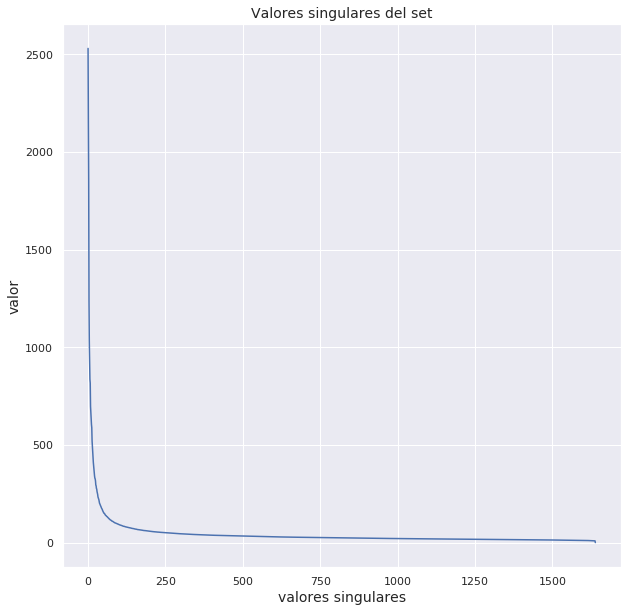

In [14]:
plt.figure(figsize=[10,10])
plt.title("Valores singulares del set",fontsize=14)
plt.xlabel("valores singulares",fontsize=14)
plt.ylabel("valor",fontsize=14)
plt.plot(s)
plt.show()

# Calculando la Energia:

# Podemos calcular la energía que conservamos usando los k valores singulares más significativos:
# ∑ (valores singulares)^2

In [15]:
# calculo de energia
valoresSingulares = s
EnergiaTotal = sum(valoresSingulares**2)
#hallamos la energia porcentual para calcular la acumulada.
valores = valoresSingulares**2
EnergiaPorcentual = ((valores / EnergiaTotal) * 100)
print(EnergiaPorcentual)

[2.38363598e+01 1.72778788e+01 1.28514603e+01 ... 3.34529361e-04
 3.29114813e-04 1.12301264e-06]


In [16]:
# realizamos entonces el calculo de cuanta energia se va
# acumulando con cada uno
energiaAcumulada = 0
PorValorEnergiaAcumulada=[] #esto es necesario para guardar los valores de la eergia acumulada por los autovalores asi graficamos.
for i in range(len(EnergiaPorcentual)):
     energiaAcumulada= energiaAcumulada + EnergiaPorcentual[i]
     PorValorEnergiaAcumulada.append(energiaAcumulada)
     print ('Numero de valor singulares ' + str(i+1) + ': ' + str(valoresSingulares[i]) + ' ' + str(round(energiaAcumulada,2)) + '%')

Numero de valor singulares 1: 2529.4226730799915 23.84%
Numero de valor singulares 2: 2153.508810010695 41.11%
Numero de valor singulares 3: 1857.2812745187593 53.97%
Numero de valor singulares 4: 1231.8920824557842 59.62%
Numero de valor singulares 5: 1031.018345890841 63.58%
Numero de valor singulares 6: 946.5477606987018 66.92%
Numero de valor singulares 7: 836.2190383347255 69.52%
Numero de valor singulares 8: 817.1869494680103 72.01%
Numero de valor singulares 9: 697.3462387057444 73.82%
Numero de valor singulares 10: 663.4262087914246 75.46%
Numero de valor singulares 11: 640.2615394266343 76.99%
Numero de valor singulares 12: 605.0116390091823 78.35%
Numero de valor singulares 13: 588.4610746532771 79.64%
Numero de valor singulares 14: 520.4987657077993 80.65%
Numero de valor singulares 15: 492.0990912276664 81.56%
Numero de valor singulares 16: 464.5579933085077 82.36%
Numero de valor singulares 17: 425.9567166220285 83.04%
Numero de valor singulares 18: 411.16303640821894 83.6

In [17]:
PorValorEnergiaAcumulada

[23.836359797600004,
 41.11423861207449,
 53.965698889182676,
 59.61952498308268,
 63.579841566160454,
 66.91780967240221,
 69.52298658010668,
 72.01092692396908,
 73.82265929249944,
 75.46242714103323,
 76.98968351724274,
 78.35340153035449,
 79.64352893064716,
 80.65286670255198,
 81.55506550022764,
 82.35910427313358,
 83.03507526513907,
 83.66490802664265,
 84.23843684468218,
 84.7484522370052,
 85.21802955780032,
 85.65028119187103,
 86.05604551908124,
 86.45327305627995,
 86.82581232009797,
 87.15019062521198,
 87.4658053167551,
 87.7538149713662,
 88.03402513596693,
 88.28902219254869,
 88.53083900898785,
 88.75818786240258,
 88.96277204101072,
 89.15839776577684,
 89.34540415165154,
 89.52482749058153,
 89.69083608010969,
 89.84299121266721,
 89.99024550958947,
 90.13063137510518,
 90.26577866945965,
 90.39635789996989,
 90.52185909716734,
 90.64065778917728,
 90.75623346574633,
 90.86729375211911,
 90.97486036456684,
 91.07551830639574,
 91.17291128042446,
 91.26534115040495,


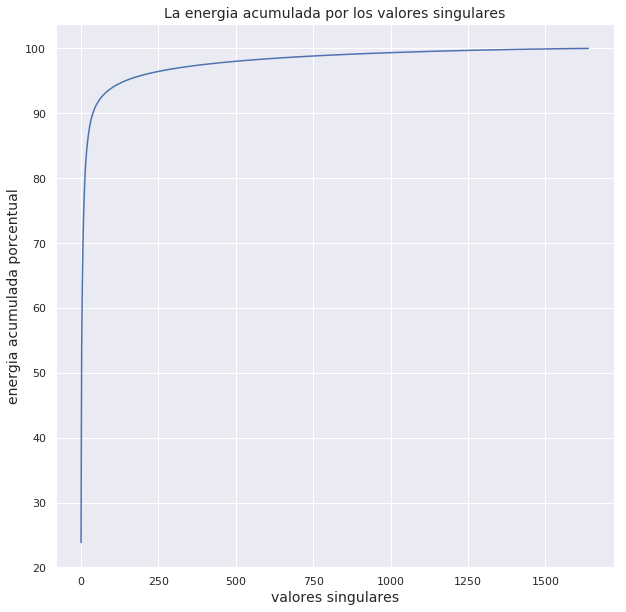

In [18]:
plt.figure(figsize=[10,10])
plt.title("La energia acumulada por los valores singulares",fontsize=14)
plt.xlabel("valores singulares",fontsize=14)
plt.ylabel("energia acumulada porcentual",fontsize=14)
plt.plot(PorValorEnergiaAcumulada)
plt.show()

***
***

# b. Con los dos gráficos anteriores, indicar qué valor de k se podría utilizar para realizar una aproximación. 
* # Concluimos que con 400 valores singulares, podemos capturar el 97,53% de la energia de la matriz mientras que con 820 valores singulares podemos capturar la totalidad de la energia de la matriz con un 99%.
***
***

# c. Realizar una reducción a dos dimensiones del set de datos y graficar los puntos en un scatter-plot utilizando colores para indicar el label correspondiente a cada punto.


In [74]:
from scipy.linalg import svd
from scipy.sparse.linalg import eigs
from scipy.sparse.linalg import svds

In [75]:
k = 2
uk, sk, vtk = svds(dataMat,k)

In [76]:
sk

array([2153.50881001, 2529.42267308])

In [77]:
reconstDosDimen=np.matrix(uk)
reconstDosDimen

matrix([[-0.05159181, -0.00703632],
        [-0.04717453, -0.01036805],
        [-0.04945944, -0.0061543 ],
        ...,
        [ 0.00934088, -0.00904139],
        [-0.0430844 , -0.01286939],
        [-0.04637523, -0.01158598]])

In [78]:
dataDosDimen=pd.DataFrame(reconstDosDimen)
# Tendremos 2 columnas
dataDosDimen.rename(columns={0:'Dim1',1:'Dim2'},inplace=True)
dataDosDimen.head()


,Dim1,Dim2
0,-0.051592,-0.007036
1,-0.047175,-0.010368
2,-0.049459,-0.006154
3,-0.042320,-0.007938
4,-0.053442,-0.007425


In [79]:
label.columns

Index(['Sampleid', 'Tissue type specific', 'Tissue type'], dtype='object')

In [80]:
dataDosDimenFinal=dataDosDimen.join(label[['Tissue type']])
dataDosDimenFinal.head()

,Dim1,Dim2,Tissue type
0,-0.051592,-0.007036,Blood
1,-0.047175,-0.010368,Brain
2,-0.049459,-0.006154,Brain
3,-0.042320,-0.007938,Brain
4,-0.053442,-0.007425,Brain


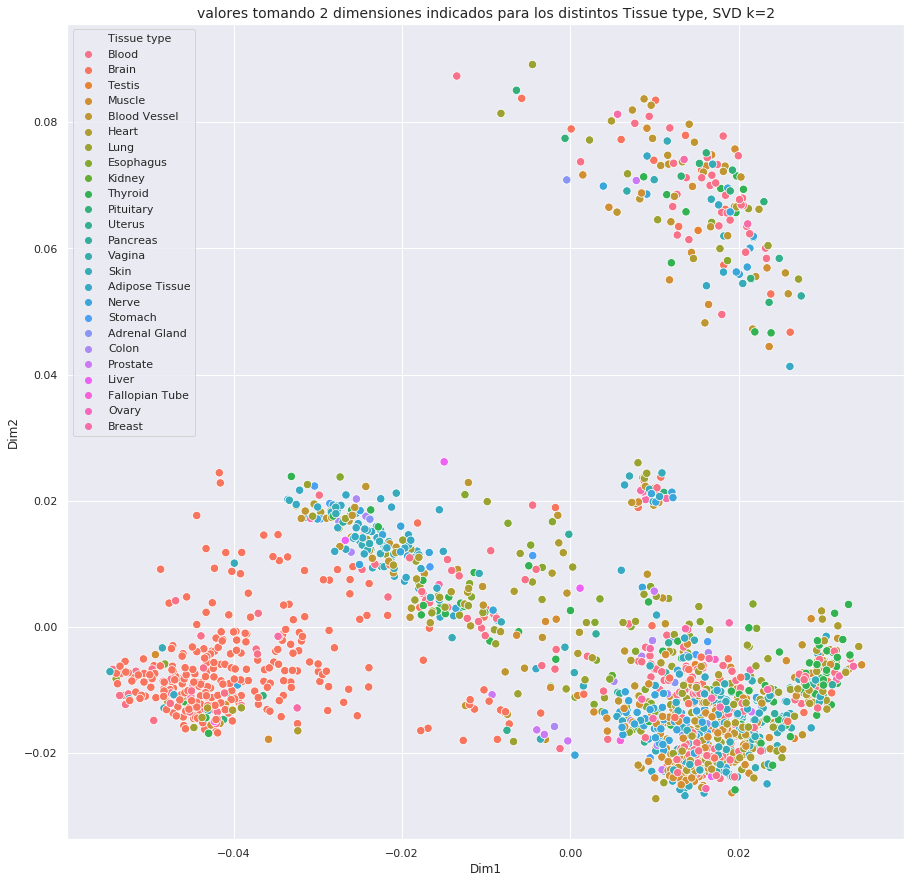

In [83]:
plt.figure(figsize=[15,15])

grafit= sns.scatterplot(x='Dim1', y='Dim2', data=dataDosDimenFinal,hue='Tissue type',s=70)
plt.title('valores tomando 2 dimensiones indicados para los distintos Tissue type, SVD k=2', fontsize=14)
plt.show()

# 2.Utilizando el algoritmo t-SNE, se pide:
    a.Realizar un scatter-plot en el plano 2D, utilizando colores para indicar el label.
    b.Probar varios valores de perplexity (e.g. 3, 30, 1000). ¿Qué efectos tiene el perplexity en el gráfico?


### *** Veremos que sucede aplicando T-SNE directamente sin disminuir las dimensiones con perplexity=3 ***

In [3]:
data.shape

(1640, 16142)

In [4]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=3, n_iter=300)
tsne_results_per3 = tsne.fit_transform(data.values)

[t-SNE] Computing 10 nearest neighbors...
[t-SNE] Indexed 1640 samples in 1.088s...
[t-SNE] Computed neighbors for 1640 samples in 48.021s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1640
[t-SNE] Computed conditional probabilities for sample 1640 / 1640
[t-SNE] Mean sigma: 12.216817
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.681572
[t-SNE] KL divergence after 300 iterations: 1.980976


In [5]:
tsne_results_per3

array([[ -9.00332  , -16.406511 ],
       [ 21.564125 ,  -5.1901393],
       [ -7.7513657, -13.06476  ],
       ...,
       [ -9.130675 ,   3.1093676],
       [ 19.64603  ,  -7.048348 ],
       [ -6.2704268, -17.555977 ]], dtype=float32)

In [6]:
reconst_TSNEDosDimen=np.matrix(tsne_results_per3)
reconst_TSNEDosDimen

matrix([[ -9.00332  , -16.406511 ],
        [ 21.564125 ,  -5.1901393],
        [ -7.7513657, -13.06476  ],
        ...,
        [ -9.130675 ,   3.1093676],
        [ 19.64603  ,  -7.048348 ],
        [ -6.2704268, -17.555977 ]], dtype=float32)

In [7]:
data_TSNEDosDimen=pd.DataFrame(reconst_TSNEDosDimen)
# Tendremos 2 columnas
data_TSNEDosDimen.rename(columns={0:'Dim1',1:'Dim2'},inplace=True)
data_TSNEDosDimen.head()

,Dim1,Dim2
0,-9.003320,-16.406511
1,21.564125,-5.190139
2,-7.751366,-13.064760
3,-1.570324,-5.151773
4,-8.924408,-19.170319


In [10]:
data_TSNEDosDimenFinal=data_TSNEDosDimen.join(label[['Tissue type']])
data_TSNEDosDimenFinal.head()

,Dim1,Dim2,Tissue type
0,-9.003320,-16.406511,Blood
1,21.564125,-5.190139,Brain
2,-7.751366,-13.064760,Brain
3,-1.570324,-5.151773,Brain
4,-8.924408,-19.170319,Brain


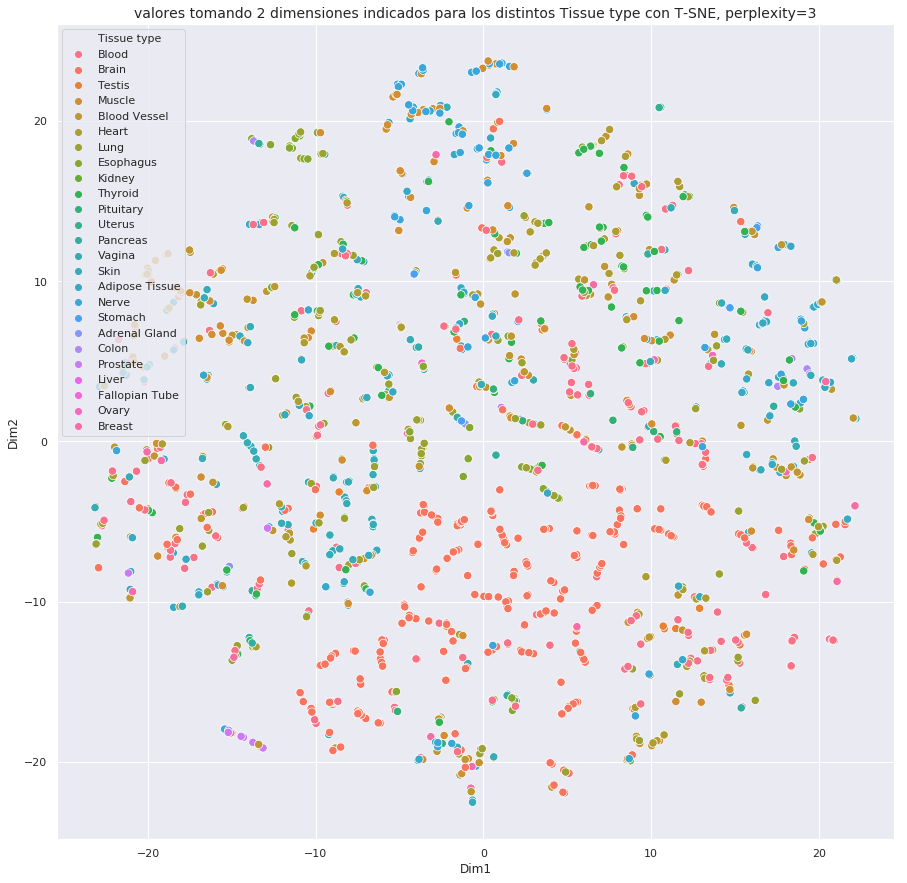

In [34]:
plt.figure(figsize=[15,15])

grafit= sns.scatterplot(x='Dim1', y='Dim2', data=data_TSNEDosDimenFinal,hue='Tissue type',s=70)
plt.title('valores tomando 2 dimensiones indicados para los distintos Tissue type con T-SNE, perplexity=3', fontsize=14)
plt.show()

### *** Si primero reducimos dimensiones con PCA por ejemplo a 1000 dimensiones y luego al resultado aplicamos tsne a 2 dimensiones ***

In [45]:
data.shape

(1640, 16142)

In [35]:
# aplicamos PCA para obtener 150 componentes principales
from sklearn.decomposition import PCA
pca_1000 = PCA(n_components=1000)
pca_result_1000 = pca_1000.fit_transform(data.values)


In [62]:
pca_result_1000.shape

(1640, 1000)

In [63]:
label.shape

(1641, 3)

In [14]:
pca_result_1000

array([[-1.76944893e+01,  1.11091520e+02, -4.99432122e+01, ...,
         6.82665069e-02,  1.01077147e-01,  1.55777164e-01],
       [-2.61218715e+01,  1.01578893e+02, -6.01518627e+01, ...,
         3.47417529e-01, -6.97521317e-01,  1.44071026e+00],
       [-1.54635025e+01,  1.06499460e+02, -5.40742181e+01, ...,
        -4.39159029e-01,  2.59248227e-01, -5.62168781e-01],
       ...,
       [-2.27662570e+01, -2.01275637e+01,  2.74787691e+01, ...,
         4.73386386e-02,  3.33003600e-01, -5.22907046e-01],
       [-3.24488173e+01,  9.27707672e+01, -5.97437583e+01, ...,
         1.03343844e+00,  4.01310494e-01, -3.29431177e-01],
       [-2.92025055e+01,  9.98575975e+01, -5.73322413e+01, ...,
         4.33620452e-01, -3.30785903e-01,  4.68621305e-01]])

In [16]:
# aplicamos T-SNE 
tsne= TSNE(n_components=2, verbose=1, perplexity=3, n_iter=300)
tsne_resulPCA= tsne.fit_transform(pca_result_1000)
tsne_resulPCA

[t-SNE] Computing 10 nearest neighbors...
[t-SNE] Indexed 1640 samples in 0.032s...
[t-SNE] Computed neighbors for 1640 samples in 1.501s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1640
[t-SNE] Computed conditional probabilities for sample 1640 / 1640
[t-SNE] Mean sigma: 12.567109
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.453293
[t-SNE] KL divergence after 300 iterations: 1.954992


array([[ -5.774604 ,  -2.319261 ],
       [  3.0749469,  12.487347 ],
       [ -6.488907 ,   1.3888034],
       ...,
       [-11.214107 ,  -7.7906003],
       [  0.9368041,  10.522504 ],
       [ -5.112147 ,  -0.2321048]], dtype=float32)

In [17]:
data_tsne_resulPCA=pd.DataFrame(tsne_resulPCA)
# Tendremos 2 columnas
data_tsne_resulPCA.rename(columns={0:'Dim1',1:'Dim2'},inplace=True)
data_tsne_resulPCA.head()

,Dim1,Dim2
0,-5.774604,-2.319261
1,3.074947,12.487347
2,-6.488907,1.388803
3,-13.157257,5.767979
4,-5.897580,-4.467571


In [42]:
data_TSNE_PCA=data_tsne_resulPCA.join(label[['Tissue type']])
data_TSNE_PCA.head()

,Dim1,Dim2,Tissue type
0,-5.774604,-2.319261,Blood
1,3.074947,12.487347,Brain
2,-6.488907,1.388803,Brain
3,-13.157257,5.767979,Brain
4,-5.897580,-4.467571,Brain


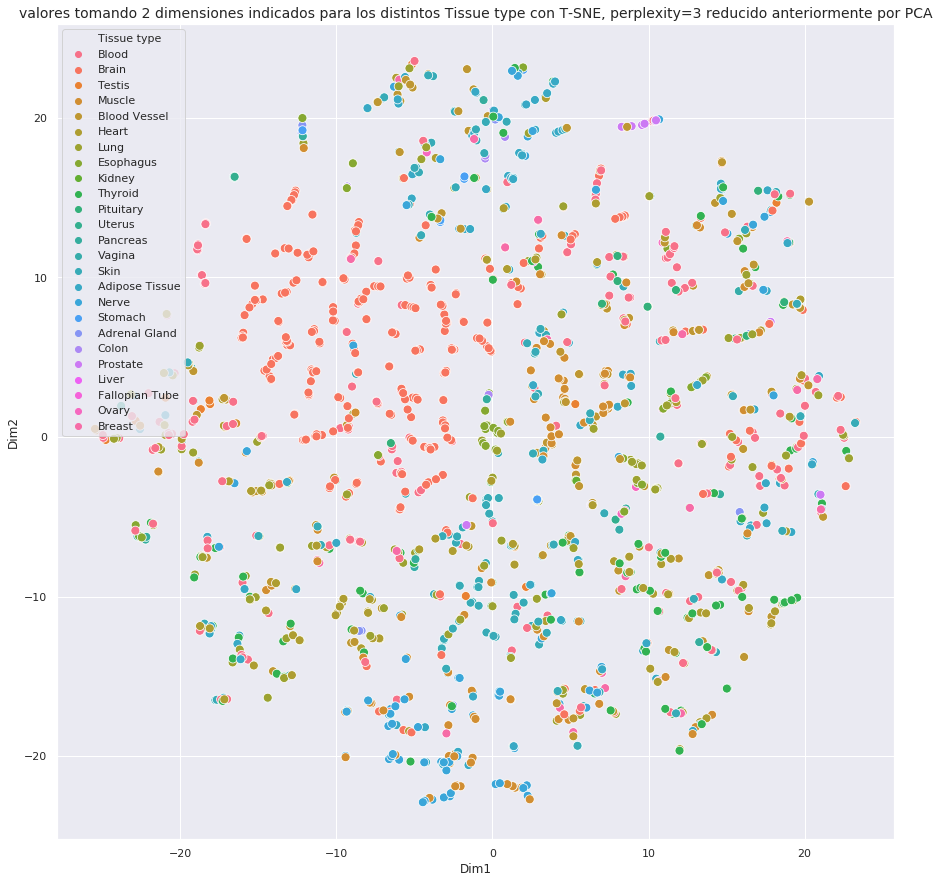

In [44]:
plt.figure(figsize=[15,15])

grafit= sns.scatterplot(x='Dim1', y='Dim2', data=data_TSNE_PCA,hue='Tissue type',s=80)
plt.title('valores tomando 2 dimensiones indicados para los distintos Tissue type con T-SNE, perplexity=3 reducido anteriormente por PCA', fontsize=14)
plt.show()

### Como se podrá apreciar si inicialmente reducimos las dimensiones, en este caso con PCA y luego con T-SNE pasados a 2 dimensiones el resultado mejora como se vera los puntos estan mejor distribuidos formando clusters mas diferenciados, pero tambien se puede lograr cambiando el perplexity en T-sne lo veremos enseguida.

***
***

### ***Aplicando T-SNE directamente sin disminuir las dimensiones con perplexity=30***

In [45]:
tsne_30 = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=300)
tsne_results_per30 = tsne_30.fit_transform(data.values)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1640 samples in 1.051s...
[t-SNE] Computed neighbors for 1640 samples in 51.590s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1640
[t-SNE] Computed conditional probabilities for sample 1640 / 1640
[t-SNE] Mean sigma: 22.731142
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.365440
[t-SNE] KL divergence after 300 iterations: 0.837425


In [46]:
tsne_results_per30

array([[-16.595892 ,   4.5225773],
       [  2.262037 ,  16.09922  ],
       [-13.889107 ,   4.396546 ],
       ...,
       [  1.6131814,   7.8890615],
       [  1.5674088,  16.01475  ],
       [-15.700419 ,   4.0302334]], dtype=float32)

In [48]:
reconst_TSNEDosDimen_per30=np.matrix(tsne_results_per30)
data_TSNEDosDimen_per30=pd.DataFrame(reconst_TSNEDosDimen_per30)
# Tendremos 2 columnas
data_TSNEDosDimen_per30.rename(columns={0:'Dim1',1:'Dim2'},inplace=True)
data_TSNEDosDimen_per30.head()

,Dim1,Dim2
0,-16.595892,4.522577
1,2.262037,16.099220
2,-13.889107,4.396546
3,-9.511372,-2.089791
4,-17.291241,4.404907


In [50]:
data_TSNEDosDimenFinal_per30=data_TSNEDosDimen_per30.join(label[['Tissue type']])
data_TSNEDosDimenFinal_per30.head()

,Dim1,Dim2,Tissue type
0,-16.595892,4.522577,Blood
1,2.262037,16.099220,Brain
2,-13.889107,4.396546,Brain
3,-9.511372,-2.089791,Brain
4,-17.291241,4.404907,Brain


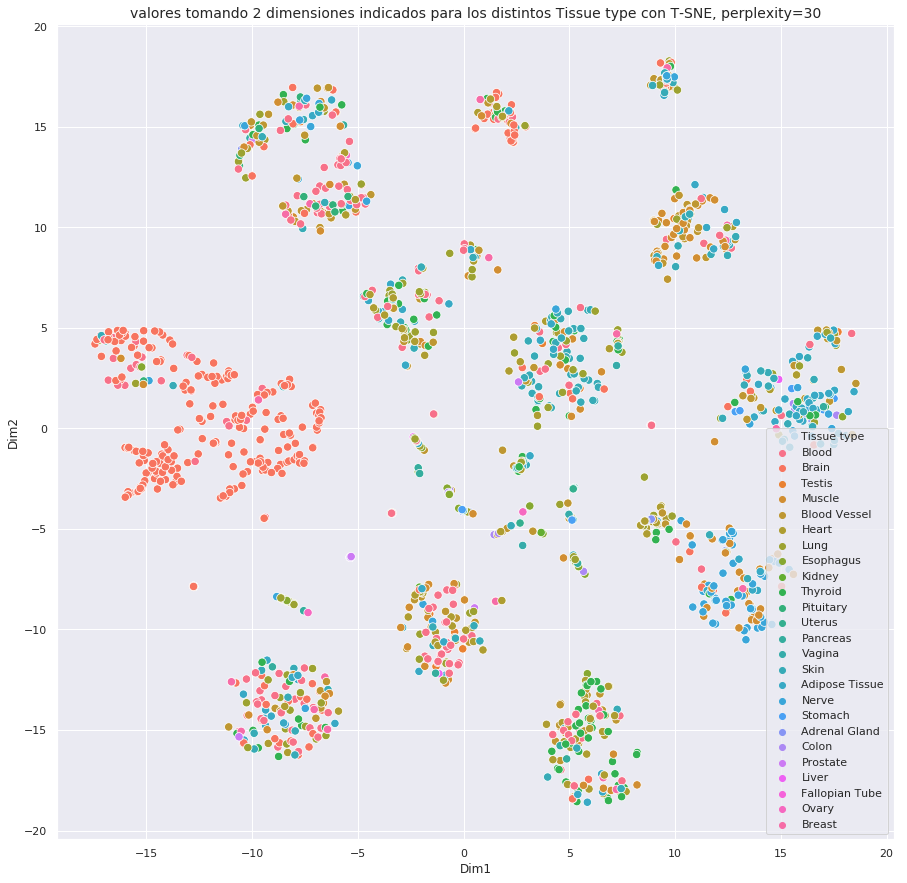

In [64]:
plt.figure(figsize=[15,15])

grafit= sns.scatterplot(x='Dim1', y='Dim2', data=data_TSNEDosDimenFinal_per30,hue='Tissue type',s=70)
plt.title('valores tomando 2 dimensiones indicados para los distintos Tissue type con T-SNE, perplexity=30', fontsize=14)
plt.show()

### *** Si primero reducimos dimensiones con PCA por ejemplo a 1000 dimensiones y luego al resultado aplicamos tsne a 2 dimensiones ***

In [53]:
# aplicamos T-SNE 
tsne_pca_30= TSNE(n_components=2, verbose=1, perplexity=30, n_iter=300)
tsne_resulPCA_per30= tsne_pca_30.fit_transform(pca_result_1000)
tsne_resulPCA_per30

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1640 samples in 0.032s...
[t-SNE] Computed neighbors for 1640 samples in 2.184s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1640
[t-SNE] Computed conditional probabilities for sample 1640 / 1640
[t-SNE] Mean sigma: 24.161827
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.294434
[t-SNE] KL divergence after 300 iterations: 0.821998


array([[ 3.0328546, 10.481964 ],
       [ 8.8714905, 14.553537 ],
       [ 0.3549264,  9.019032 ],
       ...,
       [-7.9424186, -9.048587 ],
       [ 9.116527 , 13.90814  ],
       [ 2.18504  ,  9.849739 ]], dtype=float32)

In [54]:
tsne_pca_per30=np.matrix(tsne_resulPCA_per30)
data_TSNE_PCA_per30=pd.DataFrame(tsne_pca_per30)
# Tendremos 2 columnas
data_TSNE_PCA_per30.rename(columns={0:'Dim1',1:'Dim2'},inplace=True)
data_TSNE_PCA_per30.head()

,Dim1,Dim2
0,3.032855,10.481964
1,8.871490,14.553537
2,0.354926,9.019032
3,2.173627,3.538025
4,3.730418,10.555322


In [55]:
data_TSNE_PCA_per30final=data_TSNE_PCA_per30.join(label[['Tissue type']])
data_TSNE_PCA_per30final.head()

,Dim1,Dim2,Tissue type
0,3.032855,10.481964,Blood
1,8.871490,14.553537,Brain
2,0.354926,9.019032,Brain
3,2.173627,3.538025,Brain
4,3.730418,10.555322,Brain


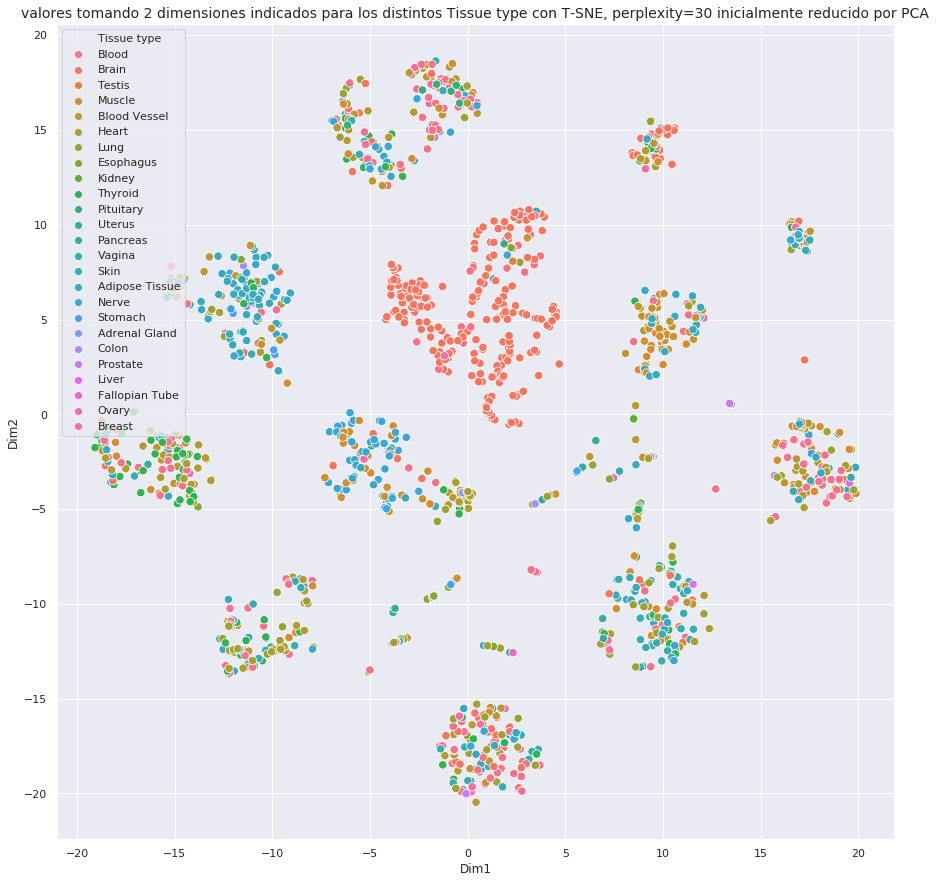

In [56]:
plt.figure(figsize=[15,15])

grafit= sns.scatterplot(x='Dim1', y='Dim2', data=data_TSNE_PCA_per30final,hue='Tissue type',s=70)
plt.title('valores tomando 2 dimensiones indicados para los distintos Tissue type con T-SNE, perplexity=30 inicialmente reducido por PCA', fontsize=14)
plt.show()

### ***Aplicando T-SNE directamente sin disminuir las dimensiones con perplexity=1000***

In [58]:
tsne_1000 = TSNE(n_components=2, verbose=1, perplexity=1000, n_iter=300)
tsne_results_per1000 = tsne_1000.fit_transform(data.values)

[t-SNE] Computing 1639 nearest neighbors...
[t-SNE] Indexed 1640 samples in 0.015s...
[t-SNE] Computed neighbors for 1640 samples in 0.635s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1640
[t-SNE] Computed conditional probabilities for sample 1640 / 1640
[t-SNE] Mean sigma: 42.973985
[t-SNE] KL divergence after 250 iterations with early exaggeration: 35.850285
[t-SNE] KL divergence after 300 iterations: 0.125164


In [59]:
reconst_TSNEDosDimen_per1000=np.matrix(tsne_results_per1000)
data_TSNEDosDimen_per1000=pd.DataFrame(reconst_TSNEDosDimen_per1000)
# Tendremos 2 columnas
data_TSNEDosDimen_per1000.rename(columns={0:'Dim1',1:'Dim2'},inplace=True)
data_TSNEDosDimen_per1000.head()

,Dim1,Dim2
0,0.871605,-3.445836
1,0.103243,-4.123685
2,1.001762,-3.298083
3,0.514071,-2.782105
4,0.911237,-3.614310


In [60]:
data_TSNEDosDimenFinal_per1000=data_TSNEDosDimen_per1000.join(label[['Tissue type']])
data_TSNEDosDimenFinal_per1000.head()

,Dim1,Dim2,Tissue type
0,0.871605,-3.445836,Blood
1,0.103243,-4.123685,Brain
2,1.001762,-3.298083,Brain
3,0.514071,-2.782105,Brain
4,0.911237,-3.614310,Brain


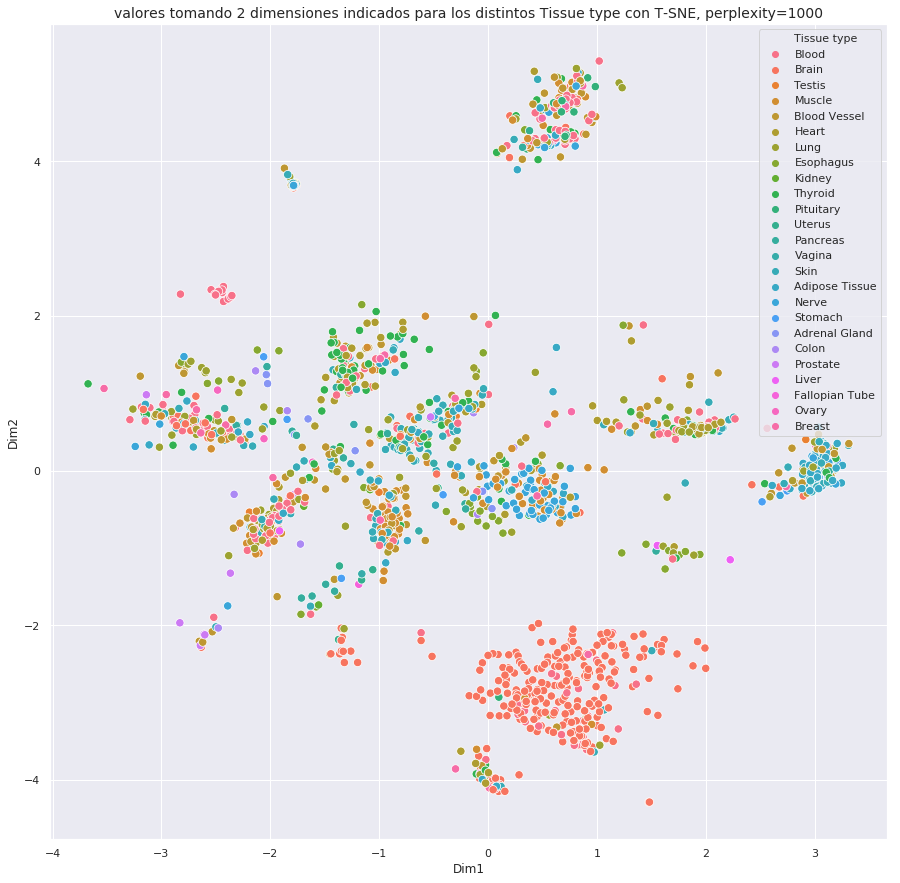

In [61]:
plt.figure(figsize=[15,15])

grafit= sns.scatterplot(x='Dim1', y='Dim2', data=data_TSNEDosDimenFinal_per1000,hue='Tissue type',s=70)
plt.title('valores tomando 2 dimensiones indicados para los distintos Tissue type con T-SNE, perplexity=1000', fontsize=14)
plt.show()

## ¿Qué efectos tiene el perplexity en el gráfico?
## Probando para los distintos valores lo que podemos ver es que con perplexity =30 la distribucion de los puntos visiblemente formando clusters muy bien distribuidos, que con perplexity =3 no lo podiamos conceguir pero con perplexity =1000 ya se hace un poco difuso se nota los puntos mas dispersos. 